In [2]:
from koala.pointsets import uniform
from koala import graph_utils as gu
from koala import plotting as pl
from koala.voronization import generate_lattice
from koala.graph_color import color_lattice
import math
from koala.flux_finder import fluxes_from_ujk, ujk_from_fluxes
from koala.lattice import Lattice
from scipy import linalg as la

from functions.koala_plantri import plantri_to_koala, read_plantri

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

cmap = mpl.colormaps["Blues"]


Lattices found:  185
565 dimerisations
7 dimerisations have 3/16 flippable
2 dimerisations have 12/16 flippable


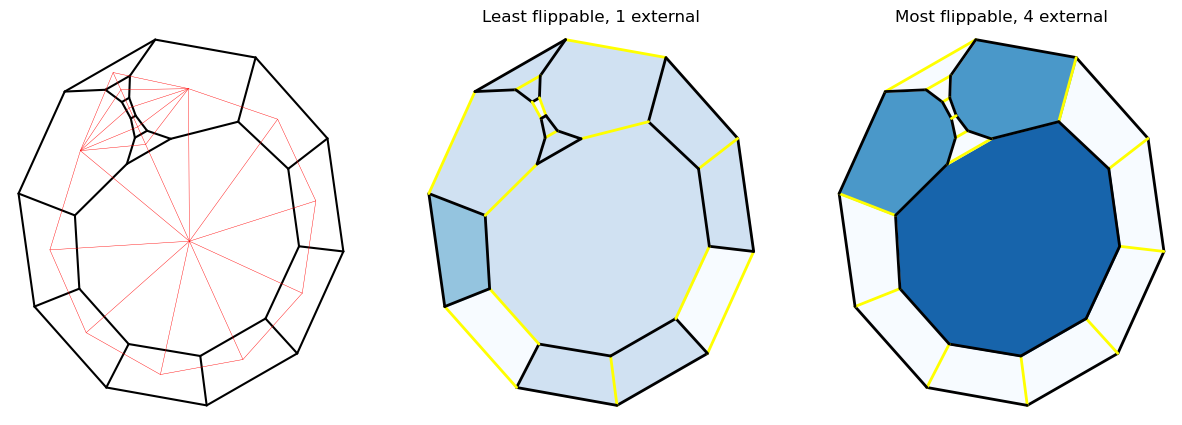

493 dimerisations
11 dimerisations have 3/16 flippable
1 dimerisations have 12/16 flippable


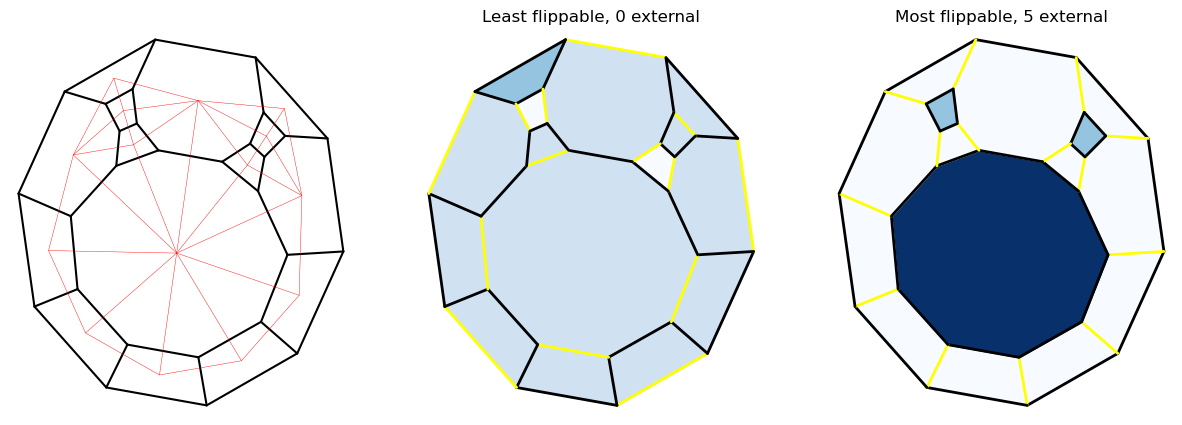

481 dimerisations
13 dimerisations have 3/16 flippable
1 dimerisations have 12/16 flippable


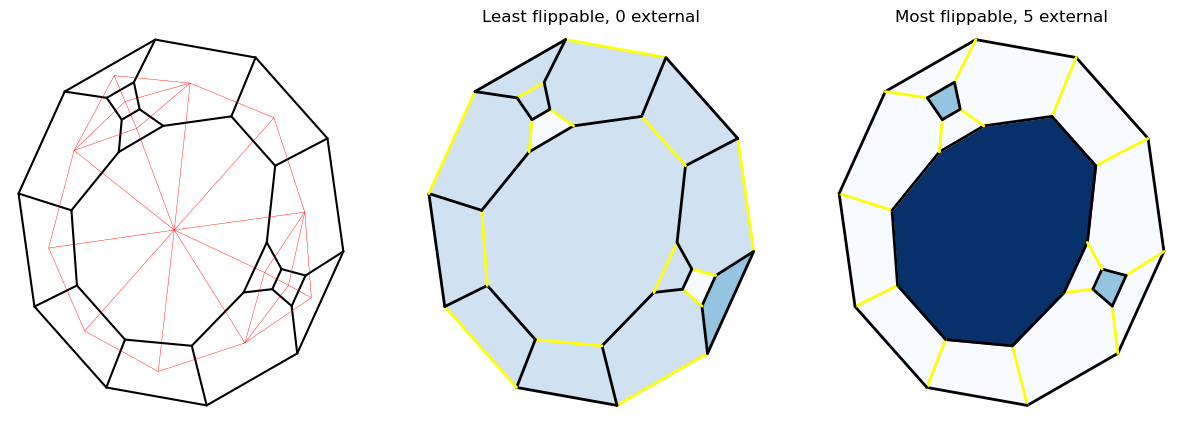

423 dimerisations
14 dimerisations have 3/16 flippable
3 dimerisations have 11/16 flippable


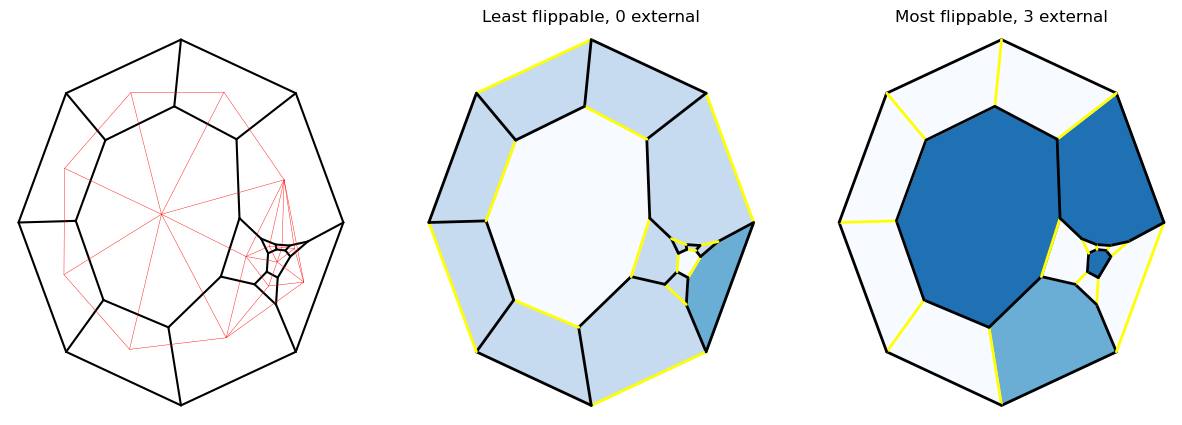

407 dimerisations
15 dimerisations have 3/16 flippable
2 dimerisations have 11/16 flippable


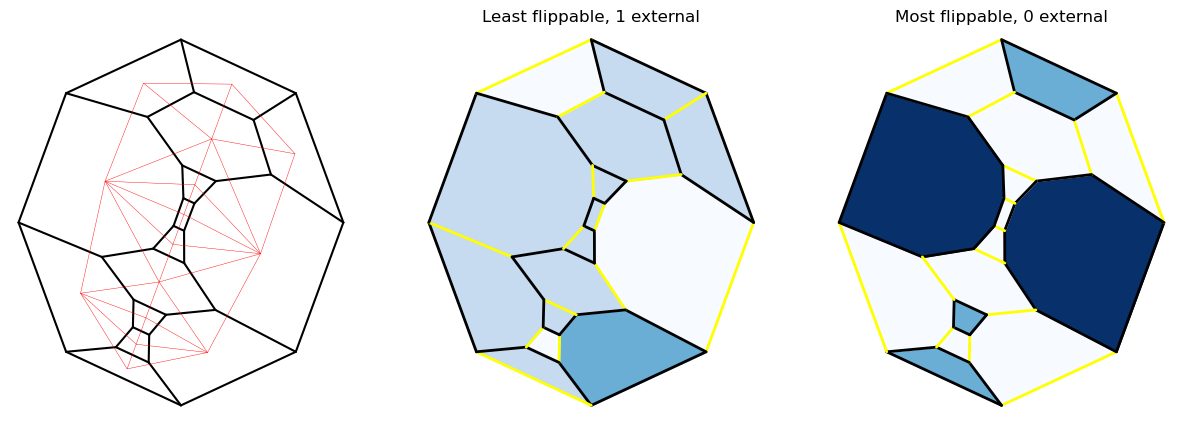

441 dimerisations
11 dimerisations have 3/16 flippable
1 dimerisations have 12/16 flippable


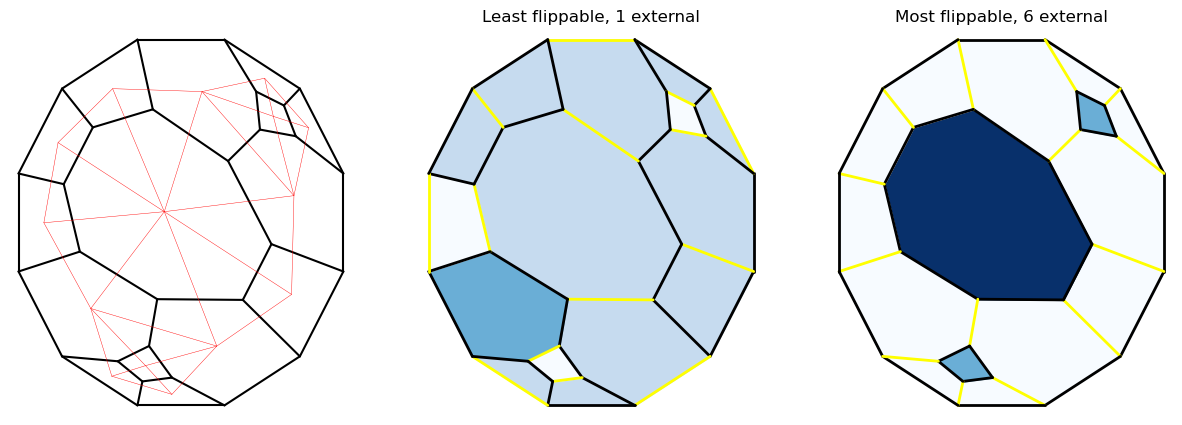

441 dimerisations
7 dimerisations have 3/16 flippable
1 dimerisations have 12/16 flippable


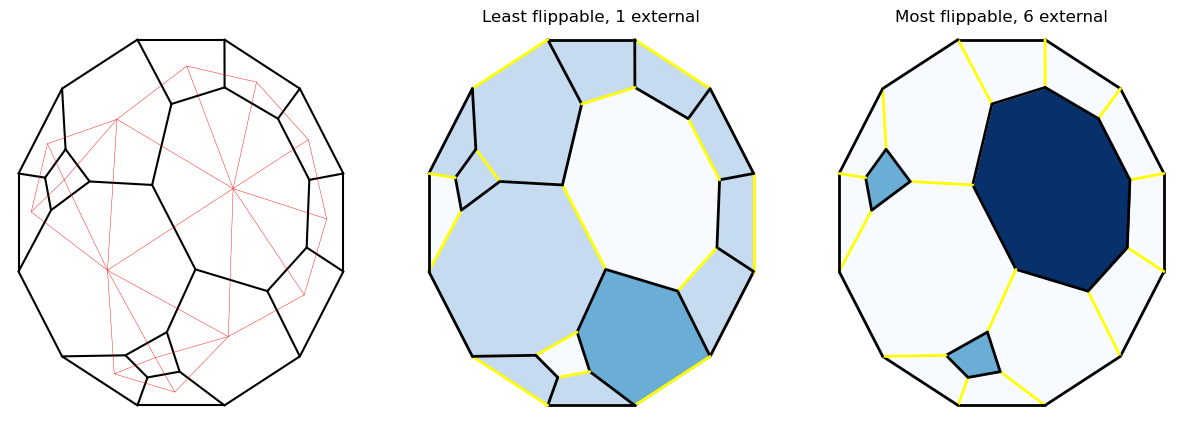

369 dimerisations
10 dimerisations have 3/16 flippable
2 dimerisations have 11/16 flippable


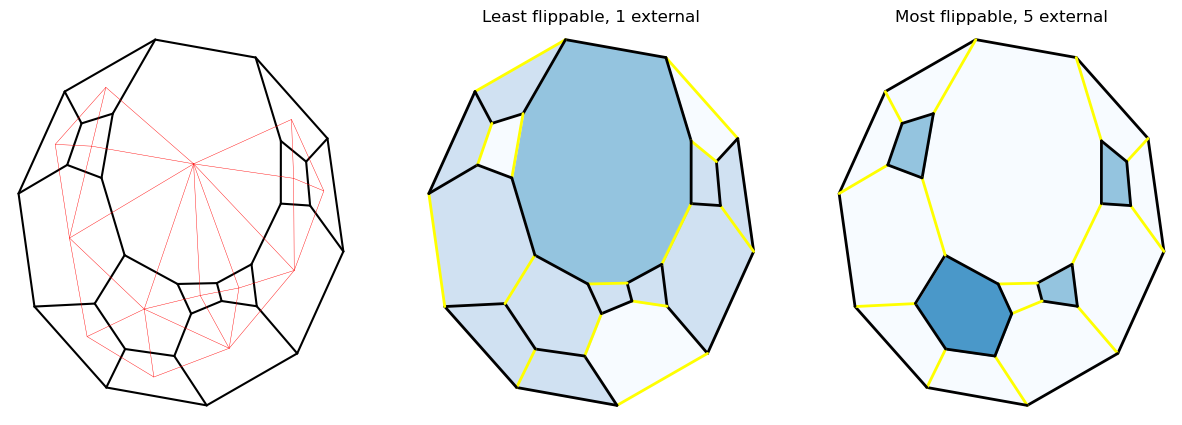

369 dimerisations
14 dimerisations have 3/16 flippable
2 dimerisations have 11/16 flippable


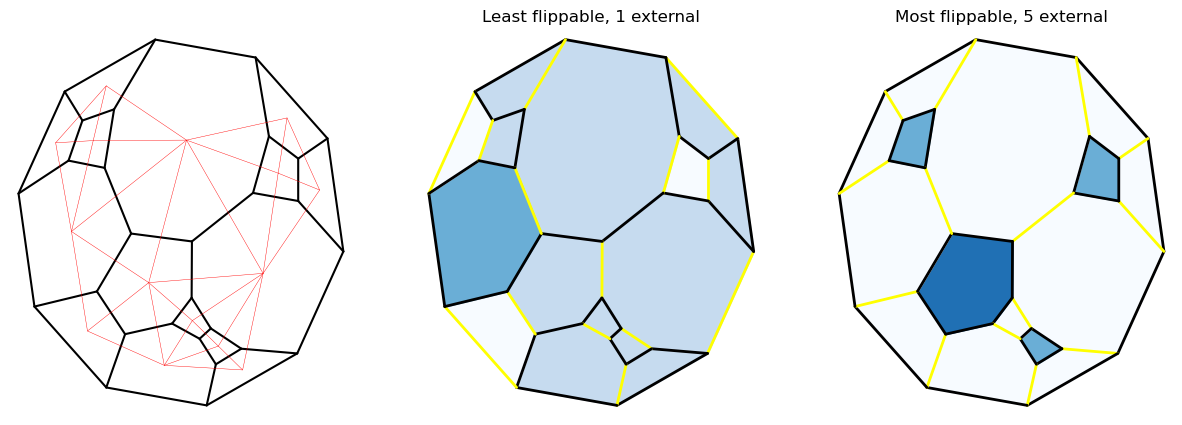

369 dimerisations
15 dimerisations have 3/16 flippable
2 dimerisations have 11/16 flippable


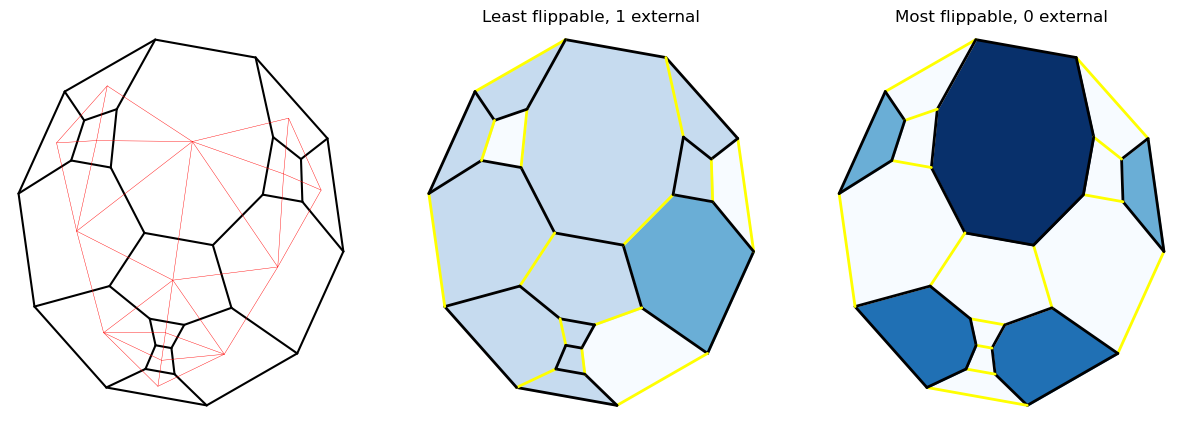

396 dimerisations
10 dimerisations have 3/16 flippable
2 dimerisations have 11/16 flippable


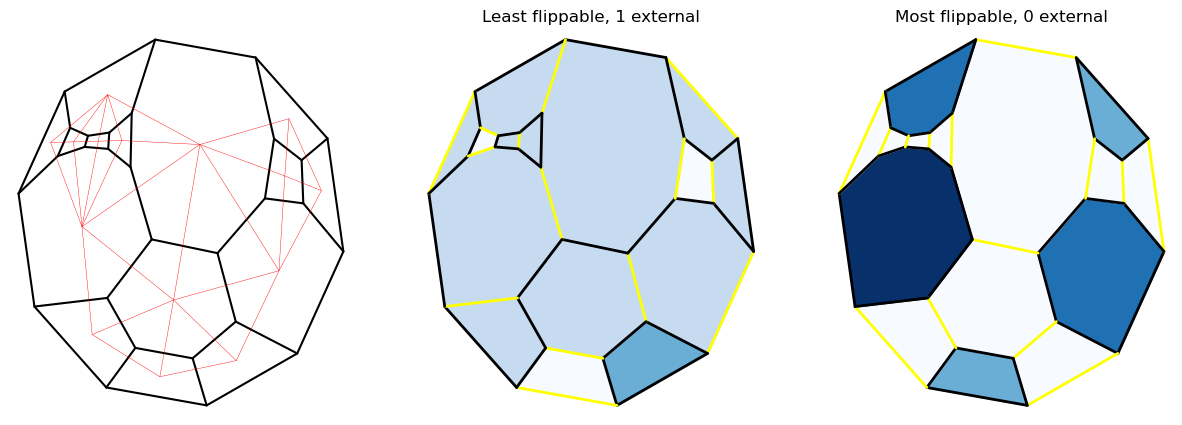

396 dimerisations
9 dimerisations have 3/16 flippable
2 dimerisations have 11/16 flippable


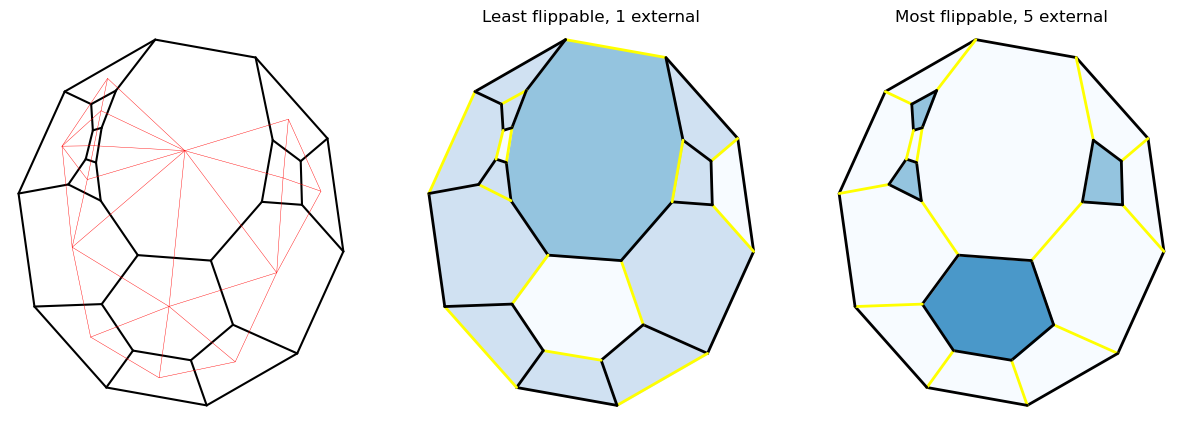

408 dimerisations
13 dimerisations have 3/16 flippable
1 dimerisations have 12/16 flippable


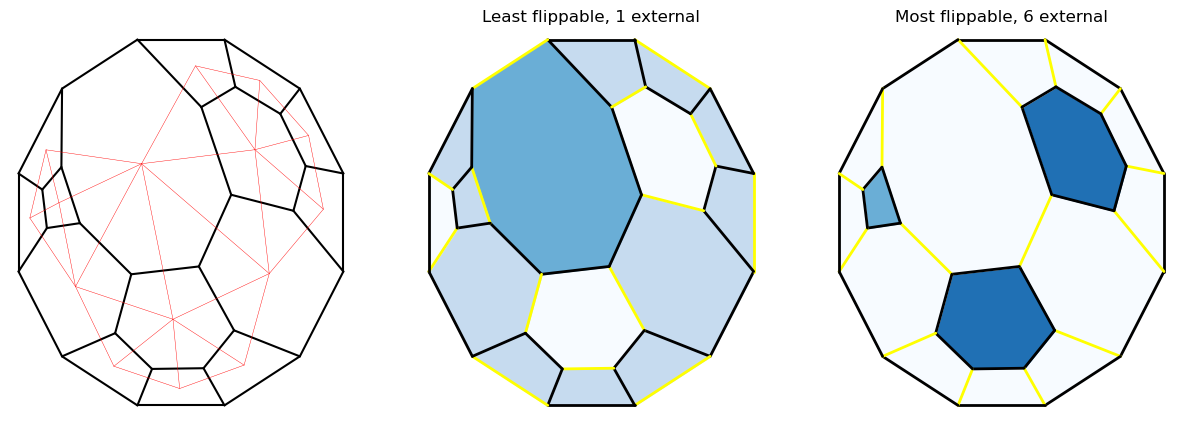

369 dimerisations
12 dimerisations have 3/16 flippable
2 dimerisations have 11/16 flippable


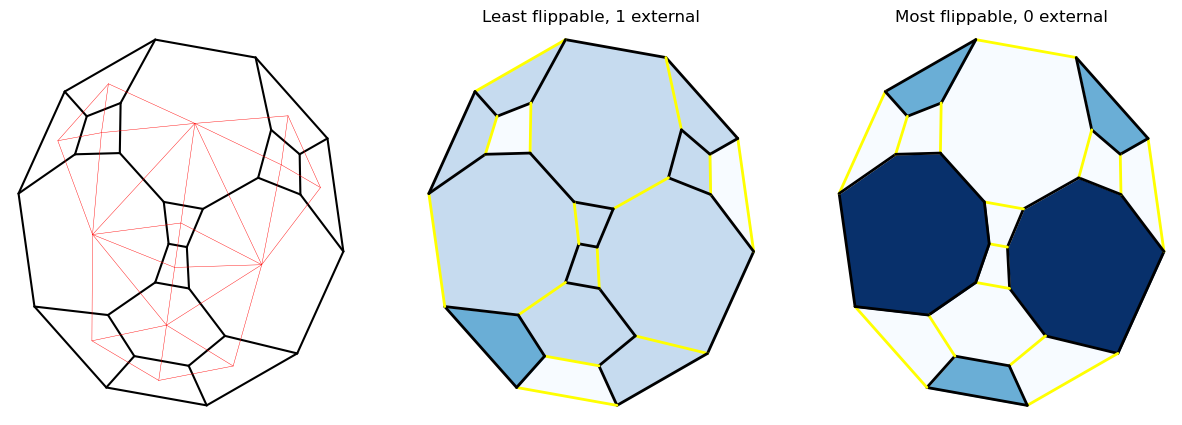

369 dimerisations
15 dimerisations have 3/16 flippable
2 dimerisations have 11/16 flippable


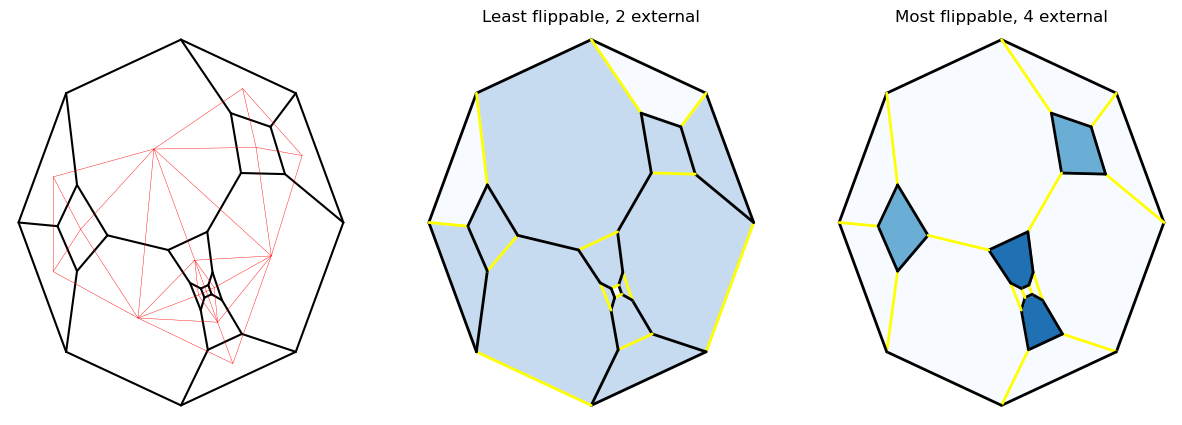

441 dimerisations
12 dimerisations have 3/16 flippable
1 dimerisations have 12/16 flippable


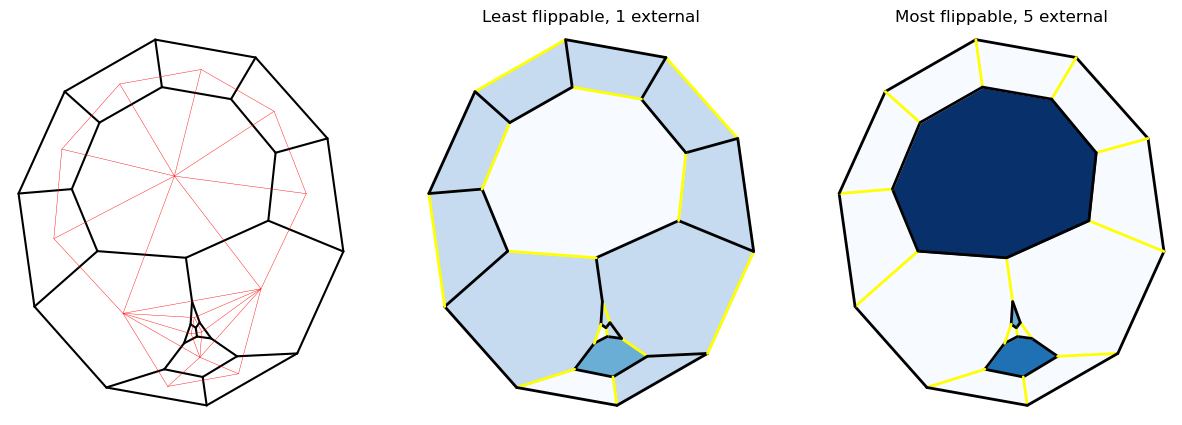

404 dimerisations
13 dimerisations have 3/16 flippable
1 dimerisations have 12/16 flippable


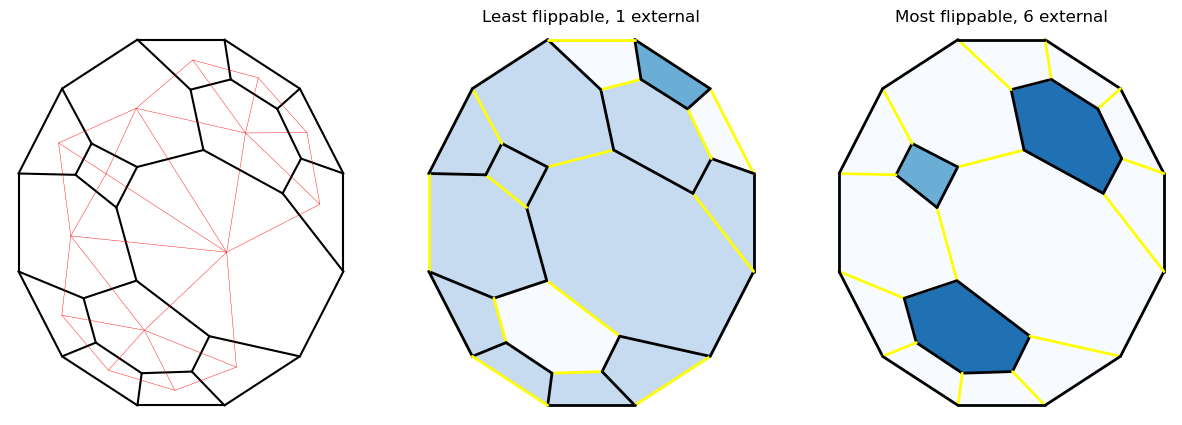

369 dimerisations
13 dimerisations have 3/16 flippable
2 dimerisations have 11/16 flippable


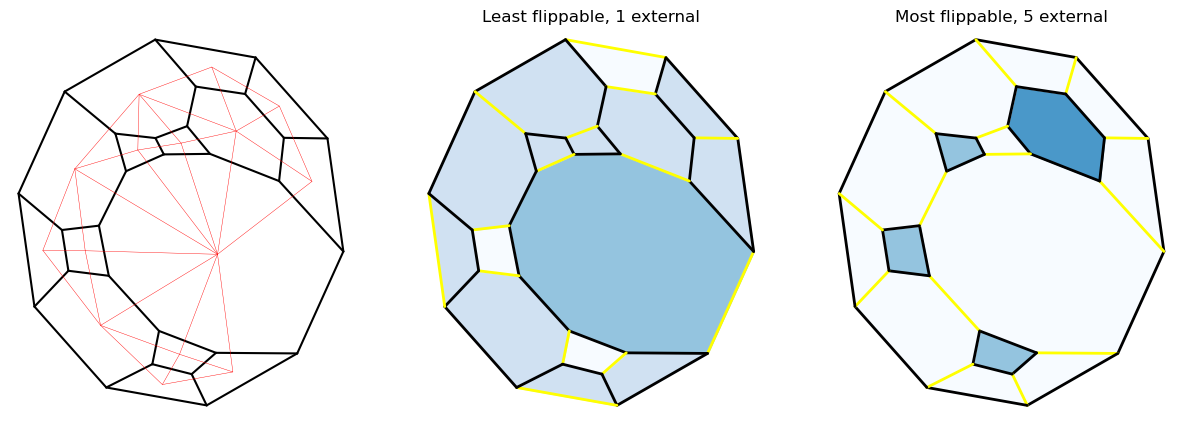

369 dimerisations
17 dimerisations have 3/16 flippable
2 dimerisations have 11/16 flippable


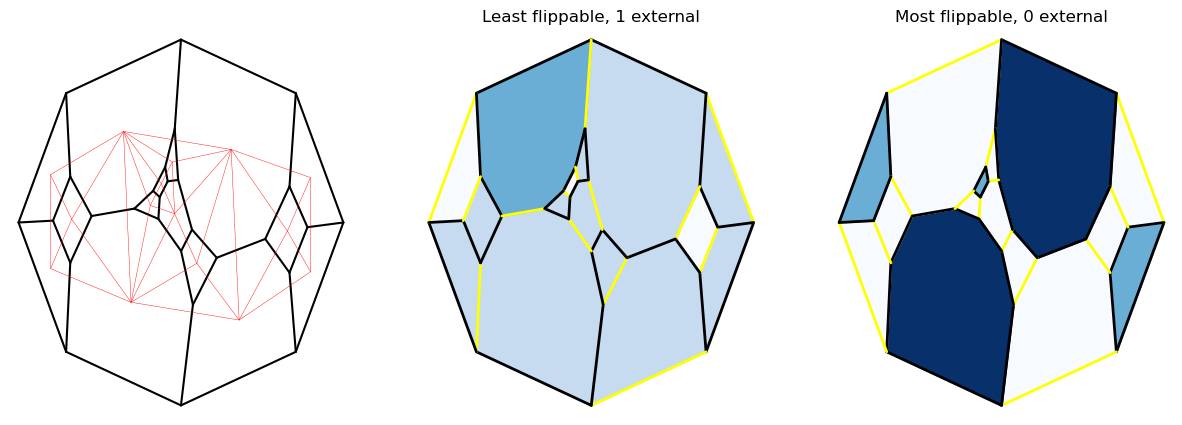

369 dimerisations
18 dimerisations have 3/16 flippable
2 dimerisations have 11/16 flippable


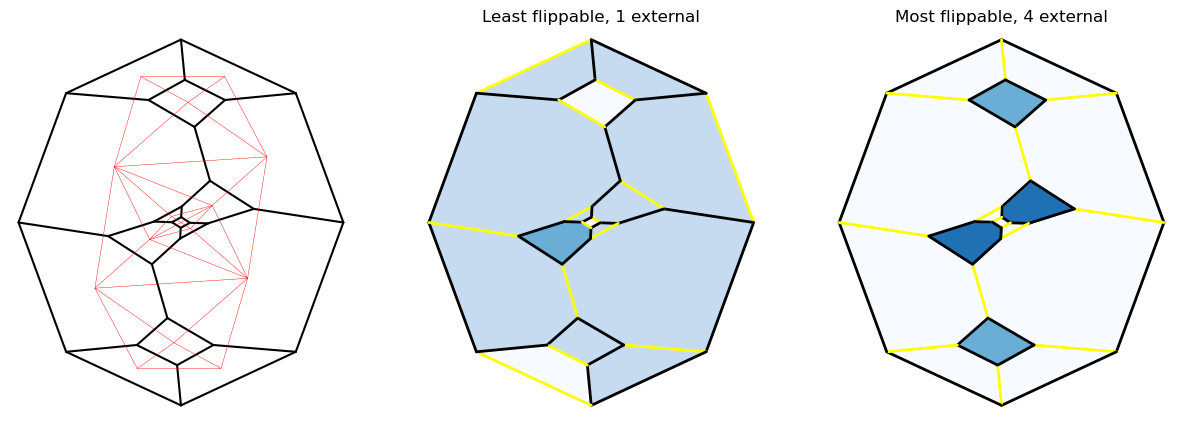

441 dimerisations
10 dimerisations have 3/16 flippable
1 dimerisations have 12/16 flippable


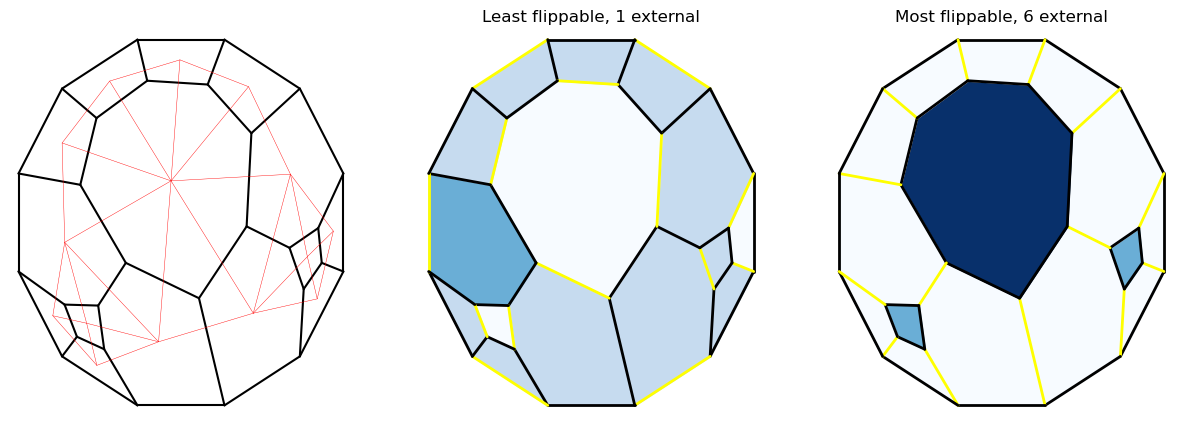

369 dimerisations
17 dimerisations have 3/16 flippable
2 dimerisations have 11/16 flippable


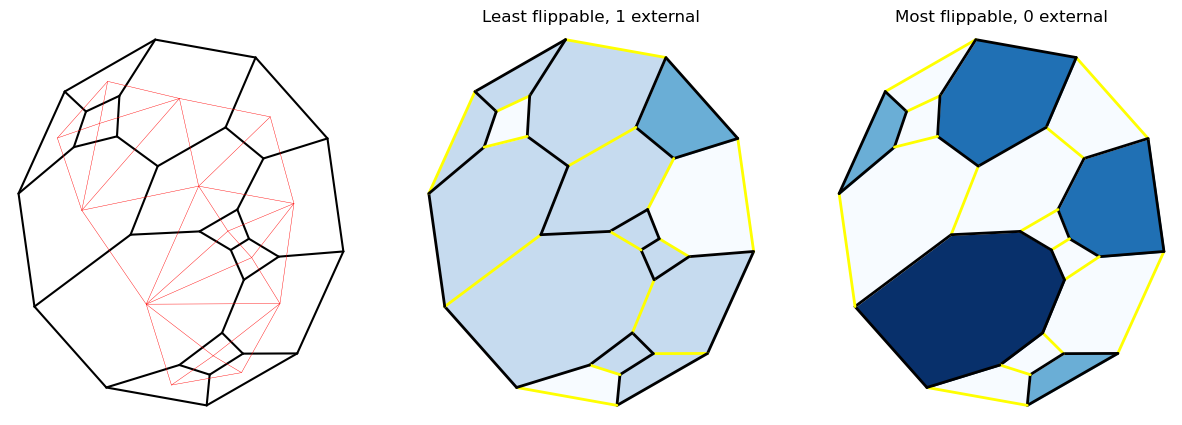

396 dimerisations
13 dimerisations have 3/16 flippable
2 dimerisations have 11/16 flippable


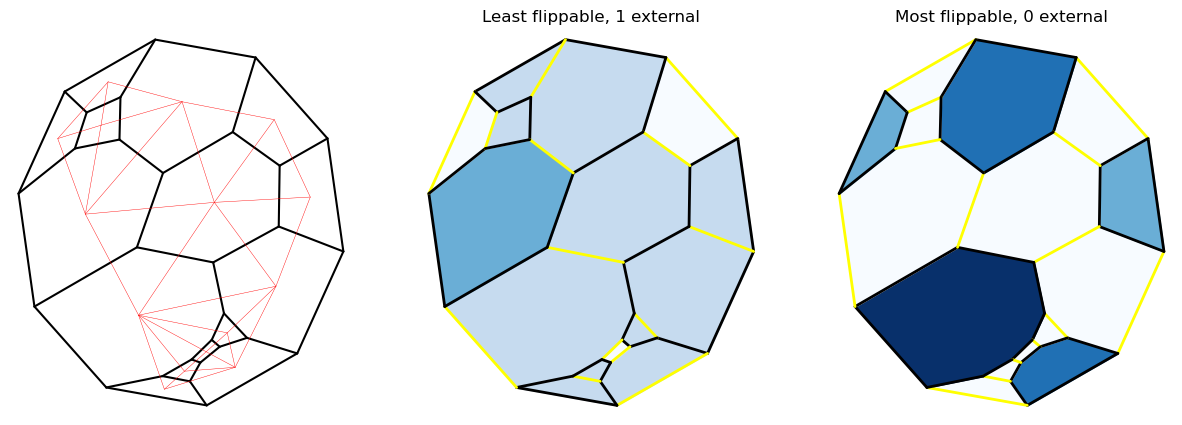

441 dimerisations
10 dimerisations have 3/16 flippable
1 dimerisations have 12/16 flippable


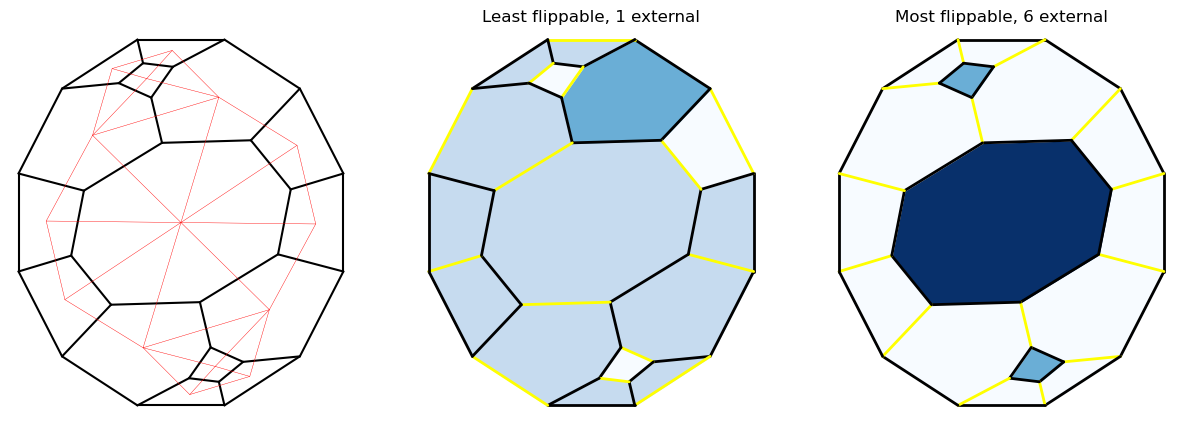

400 dimerisations
14 dimerisations have 3/16 flippable
1 dimerisations have 12/16 flippable


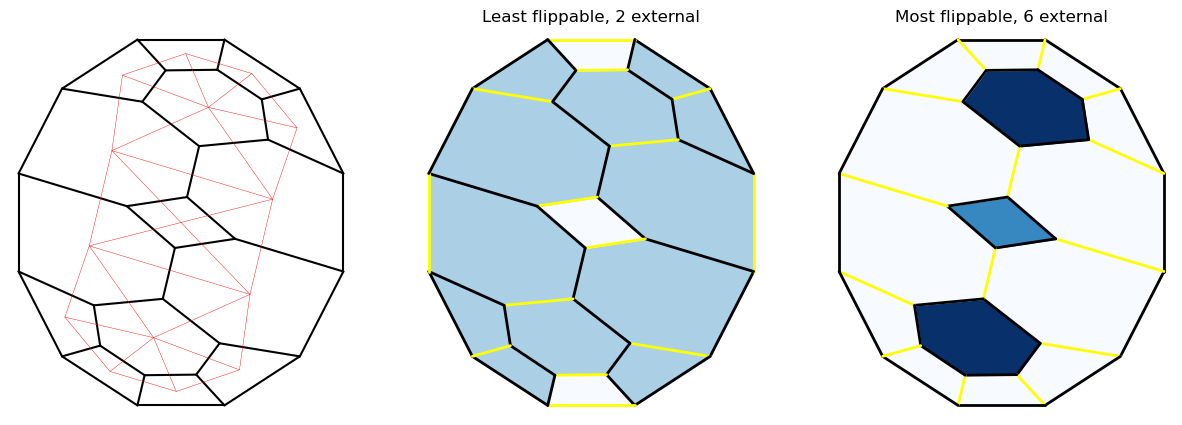

In [18]:
filename = "all_graphs/graphs_out_16"
lats = read_plantri(filename, verbose=True)

# min_scores = np.zeros
# max_scores = 

for l in lats:
    lattice = plantri_to_koala(l)
    dual = gu.make_dual(lattice)

    all_dimerisations = gu.dimerise(lattice,5000)
    plaquette_scores = np.zeros([all_dimerisations.shape[0], lattice.n_plaquettes])
    for i, dimerisation in enumerate(all_dimerisations):
        plaquette_scores[i] = np.array(
            [np.sum(1 - 2 * dimerisation[p.edges]) for p in lattice.plaquettes]
        )
    plaquette_scores = np.array(plaquette_scores) / 2

    colors = cmap(np.linspace(0, 1, np.max([plaquette_scores.astype("int")]) + 1))

    external_scores = lattice.n_plaquettes - 1 - np.sum(plaquette_scores, axis=1)
    external_scores = external_scores.astype(int)
    how_flippable = np.sum(plaquette_scores == 0, axis=1) + (external_scores == 0)

    least_flipped = np.min(how_flippable)
    least_flippable_indices = np.where(how_flippable == least_flipped)[0]
    least_flippable_dimerisations = all_dimerisations[least_flippable_indices]
    num_least = least_flippable_indices.shape[0]

    most_flipped = np.max(how_flippable)
    most_flippable_indices = np.where(how_flippable == most_flipped)[0]
    most_flippable_dimerisations = all_dimerisations[most_flippable_indices]
    num_most = most_flippable_indices.shape[0]
    
    if least_flipped == 3:
        print(f'{len(all_dimerisations)} dimerisations')
        print(
            f"{num_least} dimerisations have {least_flipped}/{lattice.n_plaquettes+1} flippable"
        )
        print(f"{num_most} dimerisations have {most_flipped}/{lattice.n_plaquettes+1} flippable")


        fig, ax = plt.subplots(1, 3, figsize=(15, 5))
        pl.plot_edges(lattice, color='black', ax = ax[0])
        pl.plot_edges(dual, color='red', linewidth=0.3, ax = ax[0])

        pl.plot_plaquettes(lattice, plaquette_scores[least_flippable_indices[0]], colors, ax=ax[1])
        pl.plot_edges(lattice, all_dimerisations[least_flippable_indices[0]], ["k", "yellow"], ax=ax[1], linewidth=2)
        ax[1].set_title(f"Least flippable, {external_scores[least_flippable_indices[0]]} external")

        pl.plot_plaquettes(lattice, plaquette_scores[most_flippable_indices[0]], colors, ax=ax[2])
        pl.plot_edges(lattice, all_dimerisations[most_flippable_indices[0]], ["k", "yellow"], ax=ax[2], linewidth=2)
        ax[2].set_title(f"Most flippable, {external_scores[most_flippable_indices[0]]} external")


        for a in ax:
            a.axis('off')
        plt.show()  
